In [9]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import contextily as ctx

In [4]:
MAX_TAXI_ZONE_ID = 265
location_ids = range(1, MAX_TAXI_ZONE_ID+1)
excluded_location_ids = [
    # We exclude the following locations:
    # 1. Middle of nowheres
    # 2. EWR Airport
    # 3. Islands (except Roosevelt Island)
    
    # Staten Island
    5,
    6,
    23,
    44,
    84,
    99, 
    109,
    110,
    115,
    118,
    156,
    172,
    176,
    187,
    204,
    206,
    214,
    221,
    245,
    251,
    
    # Ellis Island
    103,
    104,
    105,
    1, # EWR Airport (Ridesharing app pickups and dropoffs at EWR are banned.)
    2, # Jamaica Bay
    194, # Randalls Island
    264, # Unknown
    265, # Outside NYC
    179, # Rikers Island
    199, # Rikers Island
    ]

In [17]:
gdf = gpd.read_file("taxi_zone_shapefile/taxi_zones.shp")
# Set CRS explicitly if missing
gdf = gdf.set_crs("EPSG:2263").to_crs(epsg=3857)  # or use 'ESRI:102718' if EPSG fails

excluded_location_ids = [5, 6, 23, 44, 84, 99, 109, 110, 115, 118, 156, 172, 176, 187, 204, 206,
                         214, 221, 245, 251, 103, 104, 105, 1, 2, 194, 264, 265, 179, 199]
gdf = gdf[~gdf["LocationID"].isin(excluded_location_ids)]

In [18]:
# 3. Compute centroid coordinates for each zone
gdf["centroid"] = gdf.geometry.centroid
gdf["x"] = gdf.centroid.x
gdf["y"] = gdf.centroid.y

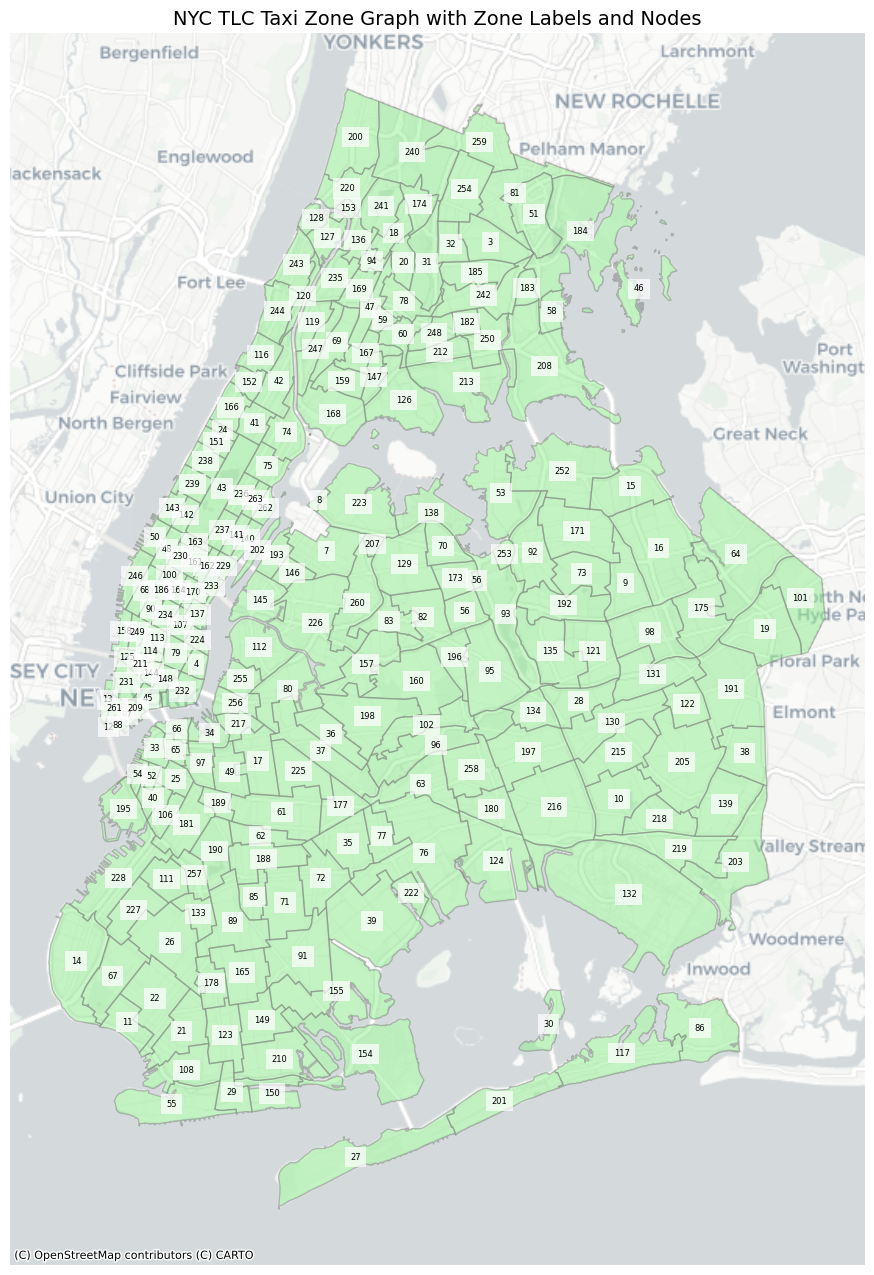

In [22]:
# 2. Create new graph for Manhattan only
G = nx.Graph()
for _, row in gdf_manhattan.iterrows():
    G.add_node(row["LocationID"],
                         zone=row["zone"],
                         borough=row["borough"],
                         pos=(row["centroid"].x, row["centroid"].y))

# 3. Set up plot
fig, ax = plt.subplots(figsize=(16, 16))
gdf.plot(ax=ax, facecolor='lightgreen', edgecolor='gray', alpha=0.5)

# 4. Draw nodes
for node in G.nodes:
    x, y = G.nodes[node]["pos"]
    ax.plot(x, y, 'o', color='blue', markersize=5)

# 5. Label each zone with its name and ID
for _, row in gdf.iterrows():
    # ax.text(row["x"], row["y"], f'{row["LocationID"]}\n{row["zone"]}', fontsize=6,
    ax.text(row["x"], row["y"], f'{row["LocationID"]}', fontsize=6,
            ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.7, lw=0))

# 6. Add some padding to map extent
xmin, ymin, xmax, ymax = gdf.total_bounds
x_pad = (xmax - xmin) * 0.05
y_pad = (ymax - ymin) * 0.05
ax.set_xlim(xmin - x_pad, xmax + x_pad)
ax.set_ylim(ymin - y_pad, ymax + y_pad)

# 7. Add basemap and cleanup
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs)
ax.set_axis_off()
plt.title("NYC TLC Taxi Zone Graph with Zone Labels and Nodes", fontsize=14)
plt.show()

